In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [2]:
# Download zip file
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 14:39:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.78MB/s    in 49s     

2020-11-01 14:40:04 (6.29 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
#ekstrak zip dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#Membuat direktori train & dataset
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#buat direktori rock, paper, scissors di direktori train & dataset
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [9]:
# memecah direktori rock, paper, scissors menjadi data train dan data validasi dengan validation 40% of dataset
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [10]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [12]:
# Menggunakan Image Generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical') # menggunakan mode categorical karena kelas lebih dari dua

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical') # menggunakan mode categorical karena kelas lebih dari dua

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
# Pembuatan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=41,  # berapa batch yang akan dieksekusi pada setiap epoch. 1312 images / 41 = batch (32)
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=27,  # berapa batch yang akan dieksekusi pada setiap epoch. 876 images / 27 = batch (32)
      verbose=2)

Epoch 1/20
41/41 - 77s - loss: 1.0610 - accuracy: 0.4291 - val_loss: 1.1600 - val_accuracy: 0.3912
Epoch 2/20
41/41 - 75s - loss: 0.6175 - accuracy: 0.7576 - val_loss: 0.4552 - val_accuracy: 0.8310
Epoch 3/20
41/41 - 75s - loss: 0.2781 - accuracy: 0.8963 - val_loss: 0.3101 - val_accuracy: 0.8866
Epoch 4/20
41/41 - 75s - loss: 0.1994 - accuracy: 0.9375 - val_loss: 0.2532 - val_accuracy: 0.9109
Epoch 5/20
41/41 - 75s - loss: 0.1619 - accuracy: 0.9398 - val_loss: 0.2818 - val_accuracy: 0.8924
Epoch 6/20
41/41 - 75s - loss: 0.1446 - accuracy: 0.9619 - val_loss: 0.1610 - val_accuracy: 0.9444
Epoch 7/20
41/41 - 75s - loss: 0.1392 - accuracy: 0.9512 - val_loss: 0.1407 - val_accuracy: 0.9444
Epoch 8/20
41/41 - 75s - loss: 0.0852 - accuracy: 0.9779 - val_loss: 0.0972 - val_accuracy: 0.9711
Epoch 9/20
41/41 - 77s - loss: 0.0801 - accuracy: 0.9764 - val_loss: 0.0961 - val_accuracy: 0.9664
Epoch 10/20
41/41 - 75s - loss: 0.0863 - accuracy: 0.9710 - val_loss: 0.1287 - val_accuracy: 0.9525
Epoch 11/

Saving nHMXDFvdVQ8Vb0F7.png to nHMXDFvdVQ8Vb0F7.png
nHMXDFvdVQ8Vb0F7.png
scissors


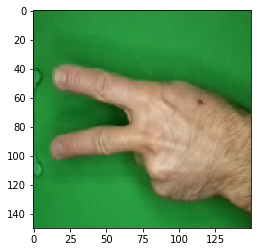

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')